# Árboles de Decisión Clasificación

## 1. Librerias y configuraciones previas


In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split

#datos
import statsmodels.api as sm


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler

#creación de modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text


#import statsmodels.api as sm
import math

#evaluacion de variables
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## 2. Funciones

In [2]:
# Función para graficar un plot con multiples gráficas del mismo tipo:
#
# df       : dataframe 
# cols     : lista de columnas a graficar
# num_cols : número de columnas 
# num_rows : número de filas
# tipo     : 'c' = countplot,   'b' = boxplot, 's' = scatterplot 
# targetVar: nombre de la variable comparativa de salida. Debe ser numérica y debe estar cotenida en el dataframe. 
#            Para countplot no es necesario (None)
# figsize  : tamaño del plot. Valor por defecto (16,8)
#
# *Nota: el número de filas * el número de columnas debe ser mayor al total de elementos de cols
#
# Ejemplos:     
#    plot_multiples_graficas (d, catCols, 5, 3, 'c', None, (16,12))
#    plot_multiples_graficas (d, numCols, 5, 3, 's', 'price', (16,12))
#    plot_multiples_graficas (d, ['make'], 1, 1, 'b', 'price', (16,12))
# ==============================================================================


def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):
    
    plt.rcParams['figure.figsize'] = figsize
    
    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c': 
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=d[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])

## 3. Carga del dataset

Carseats es un dataset que contiene ventas de sillas de carro para niños en 400 almacenes

In [3]:
d=pd.read_csv('./datasets/02_GermanCredit_Prep.csv')

In [4]:
## Cargar datos con colab
## =============================================================================

#from google.colab import drive 
#import os

#drive.mount('/gdrive')

In [5]:
#os.chdir("/gdrive/MyDrive/ModelosCuantitativosPython/Notebooks")
#!ls

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   checking_account_status   1400 non-null   object
 1   loan_duration_mo          1400 non-null   int64 
 2   credit_history            1400 non-null   object
 3   purpose                   1400 non-null   object
 4   loan_amount               1400 non-null   int64 
 5   savings_account_balance   1400 non-null   object
 6   time_employed_yrs         1400 non-null   object
 7   payment_pcnt_income       1400 non-null   int64 
 8   gender_status             1400 non-null   object
 9   other_signators           1400 non-null   object
 10  time_in_residence         1400 non-null   int64 
 11  property                  1400 non-null   object
 12  age_yrs                   1400 non-null   int64 
 13  other_credit_outstanding  1400 non-null   object
 14  home_ownership          

## 4. Visualización de datos

### Variables de entrada

In [7]:
#Lista de variables categóricas
catCols = d.select_dtypes(include = ["object", 'category']).columns.tolist()

d[catCols].head()

,checking_account_status,credit_history,purpose,savings_account_balance,time_employed_yrs,gender_status,other_signators,property,other_credit_outstanding,home_ownership,job_category,telephone,foreign_worker
0,< 0 DM,critical account - other non-bank loans,radio/television,unknown/none,>= 7 years,male-single,none,real estate,none,own,skilled,yes,yes
1,0 - 200 DM,current loans paid,radio/television,< 100 DM,1 - 4 years,female-divorced/separated/married,none,real estate,none,own,skilled,none,yes
2,none,critical account - other non-bank loans,education,< 100 DM,4 - 7 years,male-single,none,real estate,none,own,unskilled-resident,none,yes
3,< 0 DM,current loans paid,furniture/equipment,< 100 DM,4 - 7 years,male-single,guarantor,building society savings/life insurance,none,for free,skilled,none,yes
4,< 0 DM,past payment delays,car,< 100 DM,1 - 4 years,male-single,none,unknown-none,none,for free,skilled,none,yes


In [8]:
#Lista de variables numéricas

numCols=d.select_dtypes(include = ['float64','float64','int32','int64']).columns.tolist()

d[numCols].head()

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,bad_credit
0,6,1169,4,4,67,2,1,0
1,48,5951,2,2,22,1,1,1
2,12,2096,2,3,49,1,2,0
3,42,7882,2,4,45,1,2,0
4,24,4870,3,4,53,2,2,1


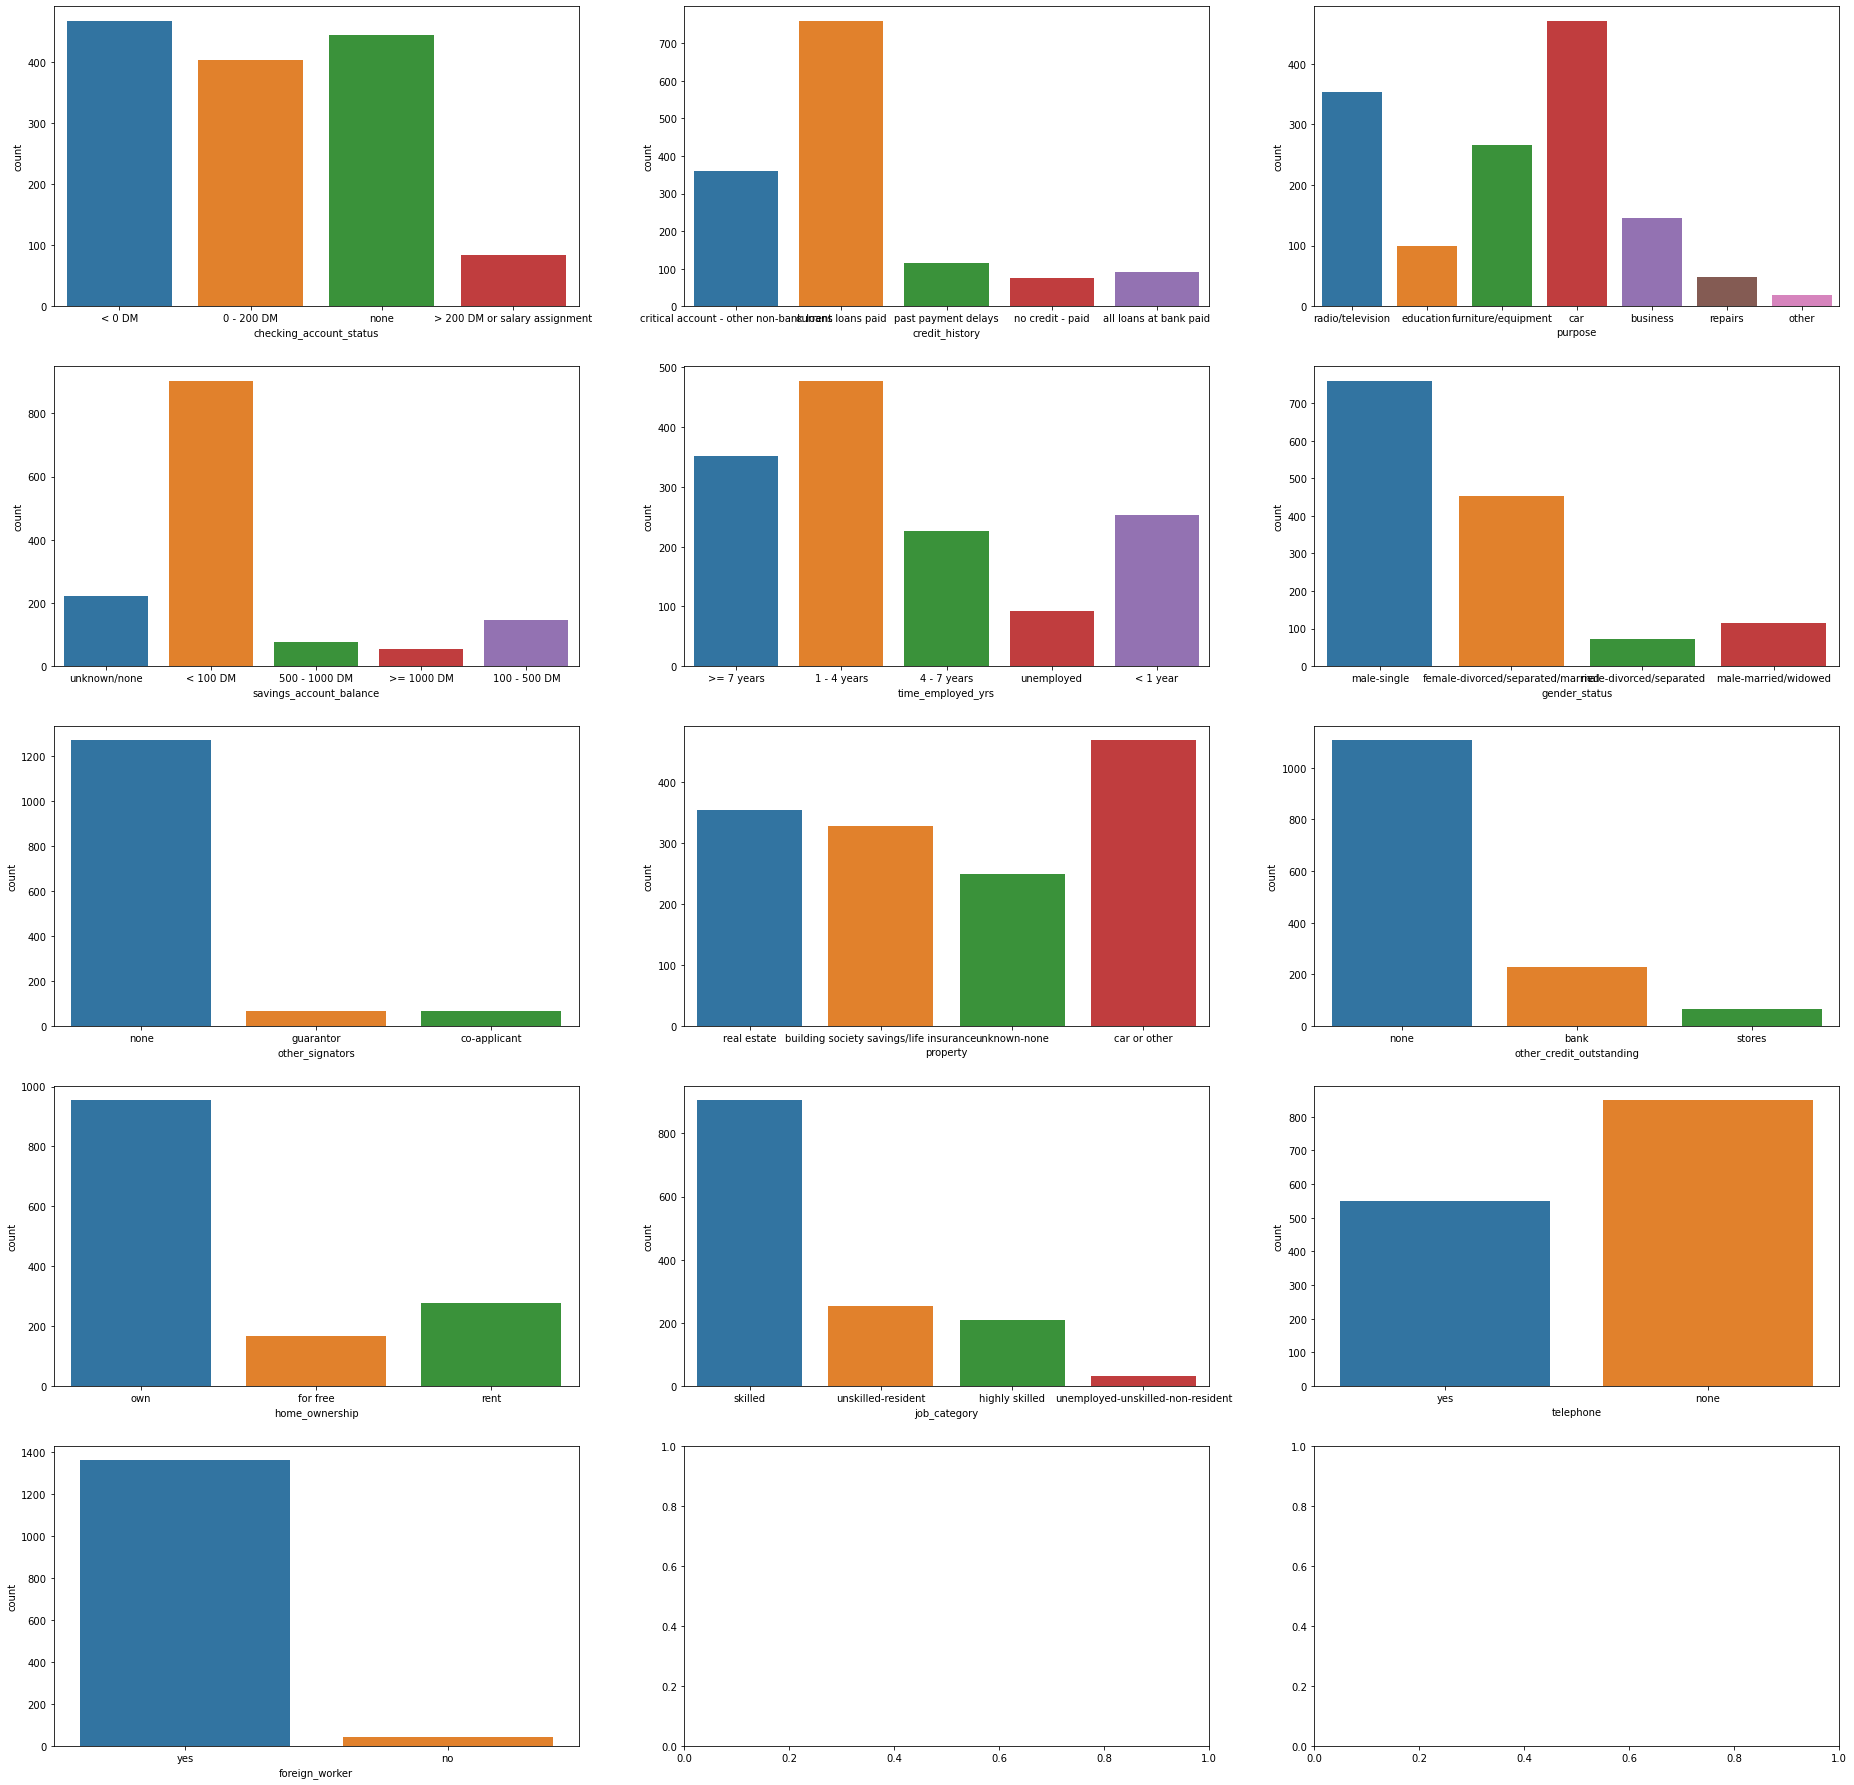

In [9]:
#Visualización de frecuencia de instancias para variables categóricas
plot_multiples_graficas(d,catCols, 3, 5, 'c', None, (32,32))

In [10]:
# Distribución de cada variable categórica en el conjunto de datos

for col in catCols:
    print("="*5 + f" {col} " + "="*20)
    print(d[col].value_counts())
    print()

===== checking_account_status ====================
< 0 DM                           468
none                             444
0 - 200 DM                       404
> 200 DM or salary assignment     84
Name: checking_account_status, dtype: int64

===== credit_history ====================
current loans paid                         760
critical account - other non-bank loans    360
past payment delays                        114
all loans at bank paid                      90
no credit - paid                            76
Name: credit_history, dtype: int64

===== purpose ====================
car                    471
radio/television       353
furniture/equipment    266
business               145
education               99
repairs                 48
other                   18
Name: purpose, dtype: int64

===== savings_account_balance ====================
< 100 DM         904
unknown/none     221
100 - 500 DM     145
500 - 1000 DM     77
>= 1000 DM        53
Name: savings_account_balance, dty

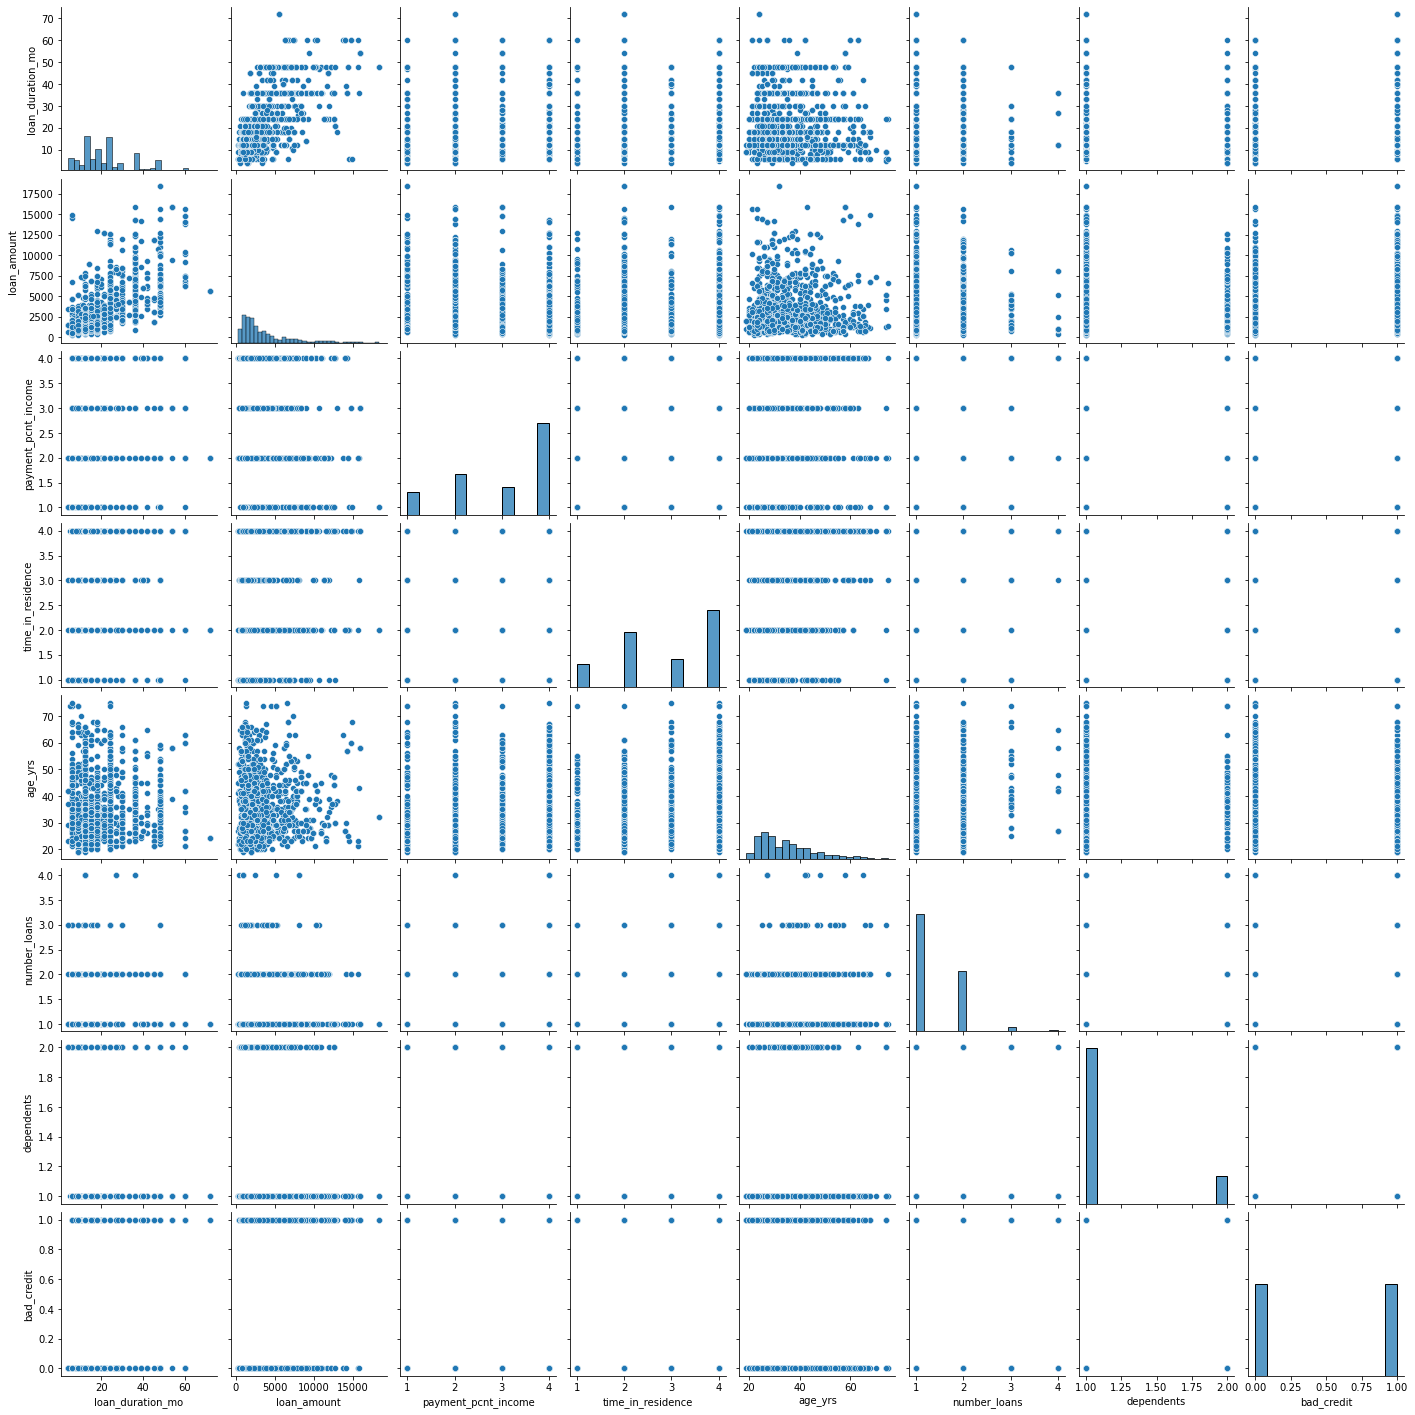

In [11]:
#Visualización de variables numéricas

sns.pairplot(d[numCols])

In [12]:
#Eliminar la variable de salida de la lista de variable numéricas
numCols.remove('bad_credit')

### Variable de salida

In [13]:
# Distriución de la variable de salida

d.groupby('bad_credit').bad_credit.count().sort_values(ascending=False)

bad_credit
0    700
1    700
Name: bad_credit, dtype: int64

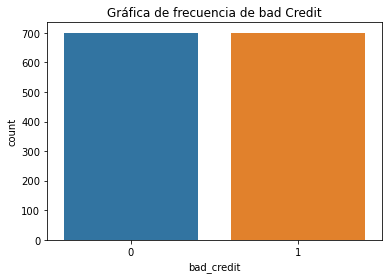

In [14]:
plt.figure(figsize=(6,4))

plt.title('Gráfica de frecuencia de bad Credit')
sns.countplot(d.bad_credit)

plt.show()

## 5. Preparación de datos

### Creación de variables Dummies 

In [15]:
# Aplicación de la función de usuario Dummies: one-hot encoding

d =pd.get_dummies(d, drop_first=1)

d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 46 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   loan_duration_mo                                        1400 non-null   int64
 1   loan_amount                                             1400 non-null   int64
 2   payment_pcnt_income                                     1400 non-null   int64
 3   time_in_residence                                       1400 non-null   int64
 4   age_yrs                                                 1400 non-null   int64
 5   number_loans                                            1400 non-null   int64
 6   dependents                                              1400 non-null   int64
 7   bad_credit                                              1400 non-null   int64
 8   checking_account_status_< 0 DM                          14

## 6. Creación del modelo

### Dividir el conjunto de datos

In [16]:
#Se establece las variables de entrada 'X' y la variable de salida 'y'
X = d.drop(columns ='bad_credit')
y = d['bad_credit']

In [17]:
# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida 

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True
                                    )

### Escalar Variables

In [18]:
#Se establecen las variables numéricas a escalar

#Num_vars se le asigna la lista con las variables numerivas para posteriormente escalarlas
num_vars = numCols

print(num_vars)

['loan_duration_mo', 'loan_amount', 'payment_pcnt_income', 'time_in_residence', 'age_yrs', 'number_loans', 'dependents']


In [19]:
#Escalar Variables númericas

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

X_train[num_vars].head()

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents
891,0.1618,0.0869,1.0000,1.0000,0.4821,0.3333,0.0000
72,0.0588,0.0503,0.6667,1.0000,0.5714,0.3333,1.0000
613,0.0882,0.0545,0.0000,1.0000,0.5179,0.0000,1.0000
184,0.2500,0.0769,1.0000,0.3333,0.3750,0.3333,1.0000
428,0.2059,0.1392,0.0000,0.6667,0.0357,0.0000,0.0000


### Creación del modelos

- **criterion** (default=”gini”): The function to measure the quality of a split. gini”, “entropy”, “log_loss” 
- **max_depth** (default=None): maxima profundidad del árbol
- **min_samples_split**(default=2): Mínimo de ejemplos para separar un nodo interno 
- **min_samples_leaf**(default=1): Mínimo numero de ejemplos requeridos en un nodo hoja
- **ccp_alpha**: Parámetro de complejidad usado para el  Minimal Cost-Complexity de poda. Es un algoritmo que se usa para podar un árbol para evitar el over-fitting

In [20]:
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

Profundidad del árbol: 5
Número de nodos terminales: 29


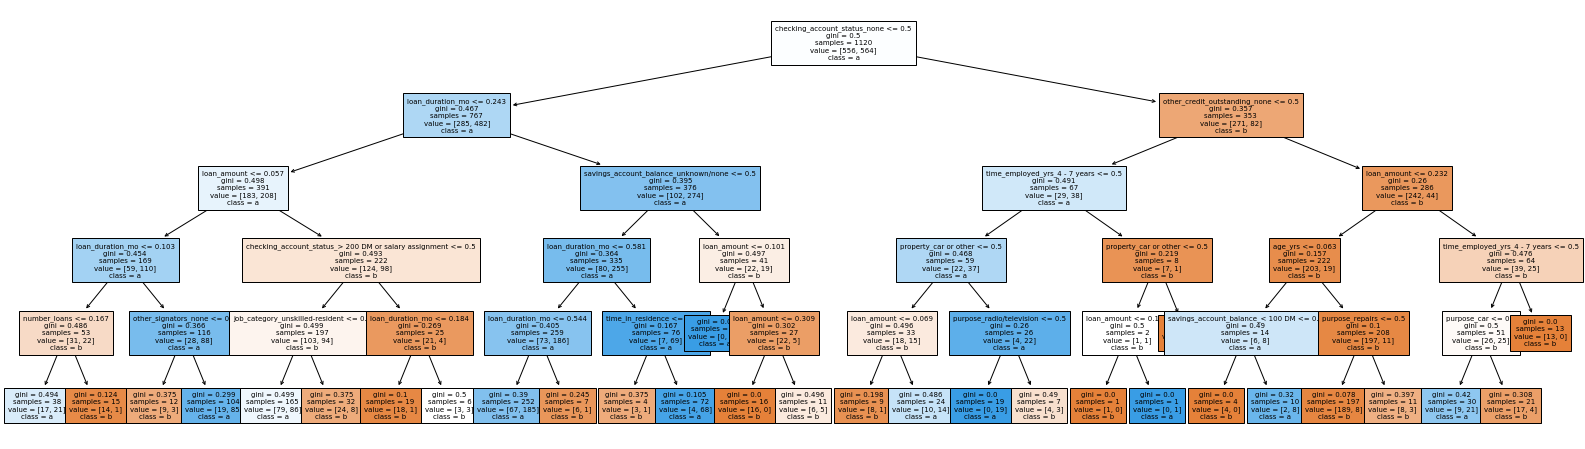

In [21]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------


fig, ax = plt.subplots(figsize=(28, 8))


print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = X.columns,
            class_names   = 'bad_credit',
            filled        = True,
            impurity      = True,
            fontsize      = 7,
            ax            = ax
       )

In [22]:
y_pred = modelo.predict(X_test)

##### Evaluación del modelo

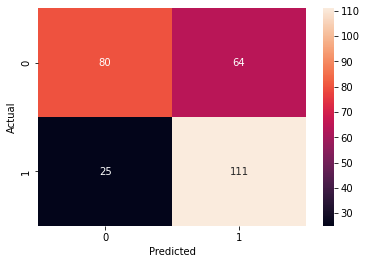

              precision    recall  f1-score   support

           0       0.76      0.56      0.64       144
           1       0.63      0.82      0.71       136

    accuracy                           0.68       280
   macro avg       0.70      0.69      0.68       280
weighted avg       0.70      0.68      0.68       280



In [23]:
# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

### Podado del árbol (pruning)

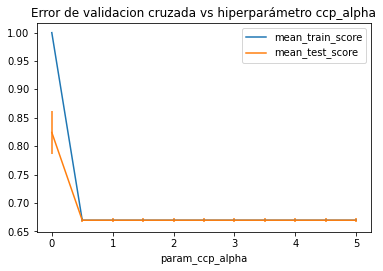

In [24]:
# Post pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 5, 11)}


# Definimos las metricas sobre las que queremos evaluar
metricas = 'f1'

# definicion de la variable con el número de pliegues
CV = 10

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible antes de aplicar el pruning
        estimator = DecisionTreeClassifier(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        scoring    = metricas,
        cv         = CV,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
#
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [25]:
# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
grid.best_params_

{'ccp_alpha': 0.0}

In [26]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

Profundidad del árbol: 18
Número de nodos terminales: 188


In [27]:
grid.best_params_

{'ccp_alpha': 0.0}

In [28]:
# Creación del modelo
# ------------------------------------------------------------------------------
modelo2 = DecisionTreeClassifier(
            max_depth         = modelo_final.get_depth(),
            ccp_alpha         = grid.best_params_["ccp_alpha"],
            criterion         = 'gini',
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=18, random_state=123)

In [29]:
y_pred = modelo2.predict(X_test)

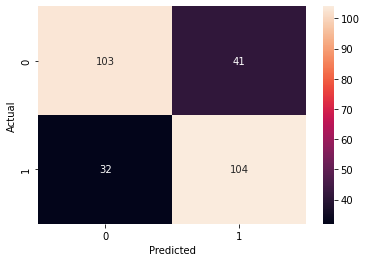

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       144
           1       0.72      0.76      0.74       136

    accuracy                           0.74       280
   macro avg       0.74      0.74      0.74       280
weighted avg       0.74      0.74      0.74       280



In [30]:
# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

## 7. Importancia de predictores

### Importancia por pureza de nodos

In [31]:
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': modelo_final.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
1,loan_amount,0.1684
9,checking_account_status_none,0.1355
0,loan_duration_mo,0.1018
4,age_yrs,0.1007
36,other_credit_outstanding_none,0.0440
2,payment_pcnt_income,0.0397
14,purpose_car,0.0256
3,time_in_residence,0.0228
5,number_loans,0.0210
18,purpose_radio/television,0.0197


In [32]:
# Predicción de probabilidades
#-------------------------------------------------------------------------------
predicciones = modelo.predict_proba(X_test)
predicciones[:10, :]

array([[0.26587302, 0.73412698],
       [0.95939086, 0.04060914],
       [0.95939086, 0.04060914],
       [0.44736842, 0.55263158],
       [0.47878788, 0.52121212],
       [0.47878788, 0.52121212],
       [0.47878788, 0.52121212],
       [0.2       , 0.8       ],
       [0.47878788, 0.52121212],
       [0.26587302, 0.73412698]])

In [33]:
# Clasificación empleando la clase de mayor probabilidad
# ------------------------------------------------------------------------------
df_predicciones = pd.DataFrame(data=predicciones, columns=['0', '1'])
df_predicciones['clasificacion_default_0.5'] = np.where(df_predicciones['0'] > df_predicciones['1'], 0, 1)
df_predicciones.head(3)

,0,1,clasificacion_default_0.5
0,0.2659,0.7341,1
1,0.9594,0.0406,0
2,0.9594,0.0406,0


In [34]:
# Clasificación final empleando un threshold de 0.7 para la clase 1.
# ------------------------------------------------------------------------------
df_predicciones['clasificacion_custom_0.7'] = np.where(df_predicciones['1'] >= 0.7, 1, 0)
df_predicciones.iloc[5:10, :]

,0,1,clasificacion_default_0.5,clasificacion_custom_0.7
5,0.4788,0.5212,1,0
6,0.4788,0.5212,1,0
7,0.2000,0.8000,1,1
8,0.4788,0.5212,1,0
9,0.2659,0.7341,1,1


#### Referencias


- Áboles de decisión
    - https://www.aprendemachinelearning.com/arbol-de-decision-en-python-clasificacion-y-prediccion/
    - https://www.cienciadedatos.net/documentos/py07_arboles_decision_python.html